In [2]:
import sys
import os
import pandas as pd
import numpy as np
from importlib import reload

# plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# local import
sys.path.append("../")
from utils.trackmate import dataEngineering as _tm
from utils.visualization import generalPlots as _gplot
from utils.visualization import vectorPlots as _vplot
from utils.trackmate import spatialAnalysis as _stat

In [22]:
DATA_NAME = 'TEST'
OUTPUT_DIR = f"{DATA_NAME}_WOUND_CLOSURE"
DATA_PATH = '/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/WH03/outputs/test/'
# DATA_PATH = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/WH03/outputs/test/trackmate/"

In [ ]:
# """Create output folder for figures """

# os.mkdir(OUTPUT_DIR)

In [23]:
df_list = []

for f in os.listdir(DATA_PATH):
    if f.endswith(".csv"):
        df = pd.read_csv(f"{DATA_PATH}{f}")
        df_list.append(df)
        
df = pd.concat(df_list, ignore_index=True)
df.head()

get_channel = lambda x: int(x[2])
get_time = lambda x: int(str(x).split("t:")[1].split("/")[0])
get_file =  lambda x: str(x).split(" - ")[1].split("#")[0].strip()

df['channel'] = df['Slice'].apply(get_channel)
df['frame'] = df['Slice'].apply(get_time)
df['file'] = df['Slice'].apply(get_file)

df.head()

,Slice,Count,Total Area,Average Size,%Area,Mean,channel,frame,file
0,c:3/4 t:1/97 - WH03A-All-Wells-After-Scratch-2...,1623,378016.784,232.912,1.173,255,3,1,WH03A-All-Wells-After-Scratch-2019-11-06-Stit
1,c:3/4 t:2/97 - WH03A-All-Wells-After-Scratch-2...,1596,376099.068,235.651,1.167,255,3,2,WH03A-All-Wells-After-Scratch-2019-11-06-Stit
2,c:3/4 t:3/97 - WH03A-All-Wells-After-Scratch-2...,1649,390380.094,236.737,1.211,255,3,3,WH03A-All-Wells-After-Scratch-2019-11-06-Stit
3,c:3/4 t:4/97 - WH03A-All-Wells-After-Scratch-2...,1698,404490.103,238.216,1.255,255,3,4,WH03A-All-Wells-After-Scratch-2019-11-06-Stit
4,c:3/4 t:5/97 - WH03A-All-Wells-After-Scratch-2...,1715,411997.634,240.232,1.278,255,3,5,WH03A-All-Wells-After-Scratch-2019-11-06-Stit


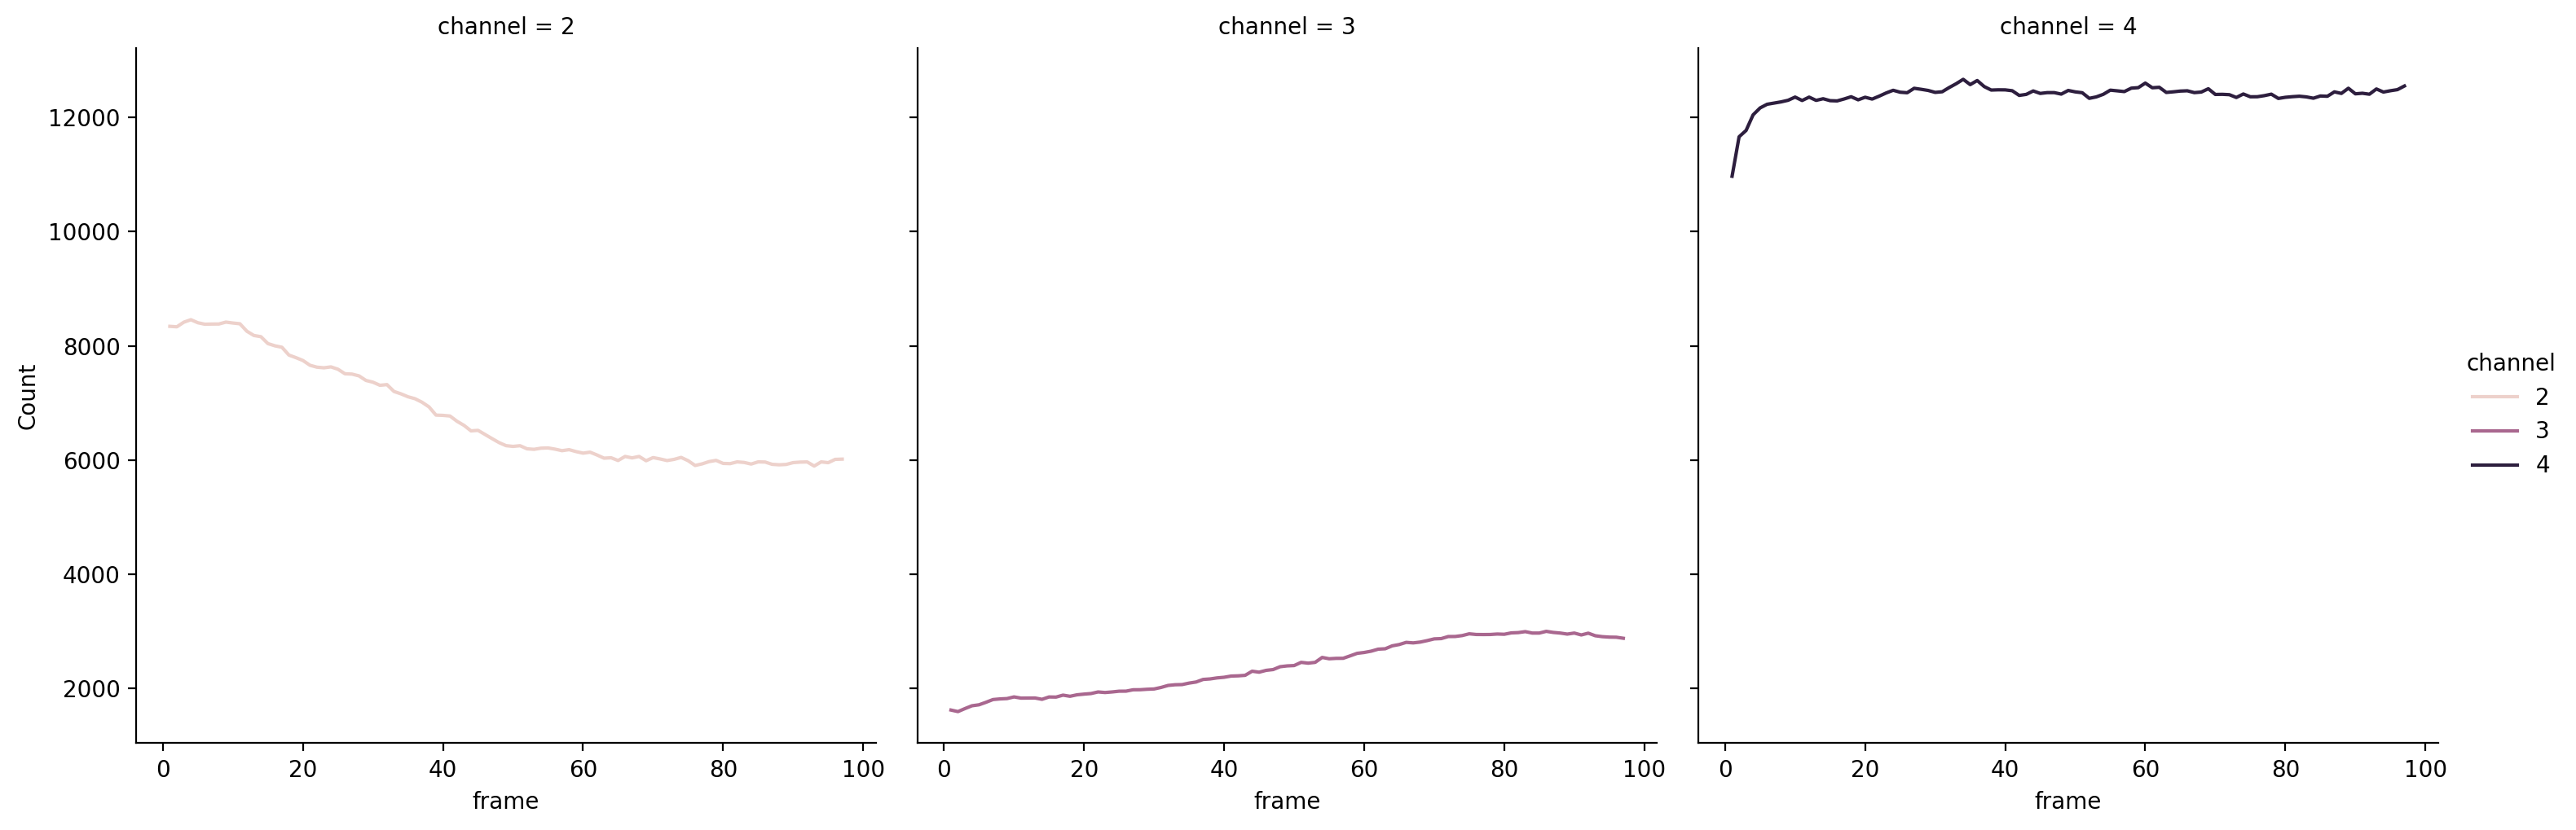

In [21]:



sns.relplot(data=df,
             x='frame',
             y='Count',
             hue='channel',
             col='channel',
             kind="line",)

In [9]:
"""Load the tracks"""

LOW_INTENSITY_THRESHOLD = 0.4

data = _tm.load_trackmate_dir(DATA_PATH)
df = _tm.merge_tracks_and_all(data)
df = _tm.clean_up_trackSpots(df, LOW_INTENSITY_THRESHOLD)
print(df.shape)

df.columns

(53356, 66)


Index(['Label_x', 'ID', 'TRACK_ID', 'QUALITY', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'FRAME', 'RADIUS', 'VISIBILITY',
       'MEAN_INTENSITY01', 'MEAN_INTENSITY02', 'MEAN_INTENSITY03',
       'MANUAL_COLOR', 'MEAN_INTENSITY', 'MEDIAN_INTENSITY', 'MIN_INTENSITY',
       'MAX_INTENSITY', 'TOTAL_INTENSITY', 'STANDARD_DEVIATION',
       'ESTIMATED_DIAMETER', 'CONTRAST', 'SNR', 'Label_y',
       'MEAN_TRACK_INTENSITY01', 'MEAN_TRACK_INTENSITY02',
       'MEAN_TRACK_INTENSITY03', 'NUMBER_SPOTS', 'NUMBER_GAPS', 'LONGEST_GAP',
       'NUMBER_SPLITS', 'NUMBER_MERGES', 'NUMBER_COMPLEX', 'TRACK_DURATION',
       'TRACK_START', 'TRACK_STOP', 'TRACK_DISPLACEMENT', 'TRACK_INDEX',
       'TRACK_X_LOCATION', 'TRACK_Y_LOCATION', 'TRACK_Z_LOCATION',
       'TRACK_MEAN_SPEED', 'TRACK_MAX_SPEED', 'TRACK_MIN_SPEED',
       'TRACK_MEDIAN_SPEED', 'TRACK_STD_SPEED', 'TRACK_MEAN_QUALITY',
       'TRACK_MAX_QUALITY', 'TRACK_MIN_QUALITY', 'TRACK_MEDIAN_QUALITY',
       'TRACK_STD_QUALITY

ValueError: alpha must be between 0 and 1, inclusive, but min is nan, max is nan

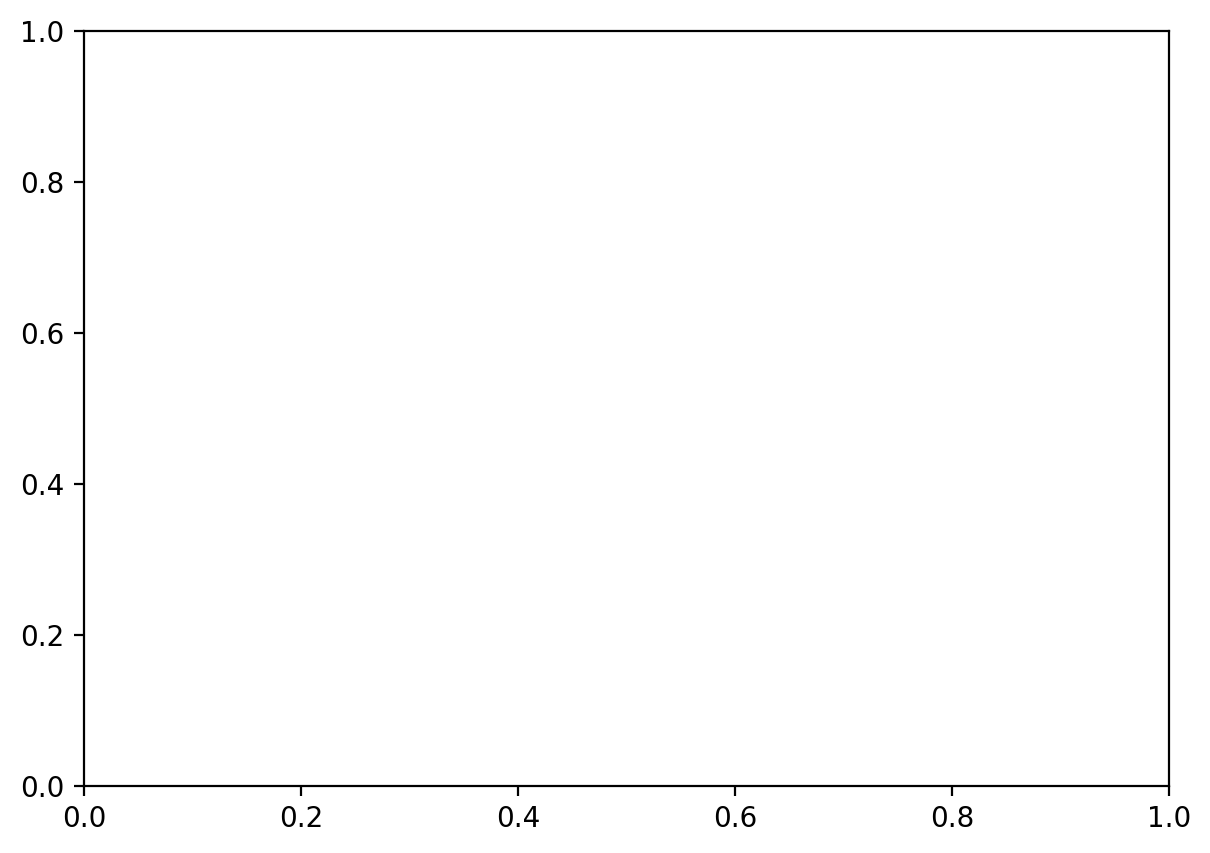

In [11]:
N_FRAMES_IN_DAY = 56
RADIUS = 0.08

rand_id = np.random.choice(df['TRACK_ID'], 1)[0]

tmp = df[(df['TRACK_ID'] == rand_id) & (df['STEP'] < N_FRAMES_IN_DAY)]

matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (7, 5)


red_y_line = [.1] * len(tmp)
plt.scatter(tmp['STEP'], 
            red_y_line, 
            c='r', 
            edgecolor='k',
            s = 80,
            alpha=tmp['MEAN_INTENSITY01_SCALED'])

green_y_line = [.2] * len(tmp)
plt.scatter(tmp['STEP'], 
            green_y_line, 
            c='g', 
            edgecolor='k',
            s = 80,
            alpha=tmp['MEAN_INTENSITY02_SCALED'])


# fig, ax = plt.subplots()
# ax.set_xlim([0, tmp['STEP'].max()])
# ax.set_ylim([0,1])

# for i, row in tmp.iterrows():
    
    
#     red_c = plt.Circle((row['STEP'], 
#                        0.333),
#                        RADIUS, 
#                        facecolor='r', 
#                        edgecolor='k',
#                        alpha=row['MEAN_INTENSITY01_SCALED'])
    
#     green_c = plt.Circle((row['STEP'], 
#                         0.6666),
#                         RADIUS, 
#                         facecolor='g', 
#                         edgecolor='k',
#                         alpha=row['MEAN_INTENSITY02_SCALED'])
#     ax.add_patch(red_c)
#     ax.add_patch(green_c)



    

# plt.scatter(tmp['STEP'], 
#             np.zeros(len(tmp['STEP'])), 
#             c='r', 
#             alpha=tmp['MEAN_INTENSITY01_SCALED'])



In [100]:
matplotlib.__version__

'3.2.2'

In [1]:
raise ValueError

ValueError: 

In [2]:
"""Load Data
"""

path = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/2021-05-12-BJ-PF-H2B-4OHT-AfterSort/analysis_files/CLEANED_TRACKS.csv"

df = pd.read_csv(path)
print(df.shape)
df.head()

(3803486, 71)


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,STEP,NORMED_STEP,MEAN_GREEN_INTENSITY_SCALED,MEAN_BLUE_INTENSITY_SCALED,MEAN_RED_INTENSITY_SCALED,MEAN_OBLIQUE_INTENSITY_SCALED,MEAN_INTENSITY_SCALED,SCENE,MyoD,SERUM
0,ID23463,23463,C4_0,2.349,429.497,1836.179,0,0.000,0,10,...,0,0.000000,0.000000,0.0,0.0,0.838258,0.0,C4,+,HS
1,ID8192,8192,C4_0,2.895,432.123,1832.823,0,1337.248,1,10,...,1,0.000047,0.000000,0.0,0.0,0.588313,0.0,C4,+,HS
2,ID13445,13445,C4_0,2.326,431.302,1827.591,0,2674.496,2,10,...,2,0.000093,0.000000,0.0,0.0,0.000000,0.0,C4,+,HS
3,ID3542,3542,C4_0,2.646,432.208,1824.476,0,4011.744,3,10,...,3,0.000140,0.714933,0.0,1.0,0.742561,0.0,C4,+,HS
4,ID17874,17874,C4_0,2.345,434.819,1822.808,0,5348.992,4,10,...,4,0.000187,0.756790,0.0,0.0,0.722367,0.0,C4,+,HS


In [29]:
df.columns

Index(['LABEL', 'ID', 'TRACK_ID', 'QUALITY', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'FRAME', 'RADIUS', 'VISIBILITY',
       'MEAN_GREEN_INTENSITY', 'MEAN_BLUE_INTENSITY', 'MEAN_RED_INTENSITY',
       'MEAN_OBLIQUE_INTENSITY', 'MANUAL_COLOR', 'MEAN_INTENSITY',
       'MEDIAN_INTENSITY', 'MIN_INTENSITY', 'MAX_INTENSITY', 'TOTAL_INTENSITY',
       'STANDARD_DEVIATION', 'ESTIMATED_DIAMETER', 'CONTRAST', 'SNR',
       'MEAN_GREEN_TRACK_INTENSITY', 'MEAN_BLUE_TRACK_INTENSITY',
       'MEAN_RED_TRACK_INTENSITY', 'MEAN_OBLIQUE_TRACK_INTENSITY',
       'NUMBER_SPOTS', 'NUMBER_GAPS', 'LONGEST_GAP', 'NUMBER_SPLITS',
       'NUMBER_MERGES', 'NUMBER_COMPLEX', 'TRACK_DURATION', 'TRACK_START',
       'TRACK_STOP', 'TRACK_DISPLACEMENT', 'TRACK_INDEX', 'TRACK_X_LOCATION',
       'TRACK_Y_LOCATION', 'TRACK_Z_LOCATION', 'TRACK_MEAN_SPEED',
       'TRACK_MAX_SPEED', 'TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED',
       'TRACK_STD_SPEED', 'TRACK_MEAN_QUALITY', 'TRACK_MAX_QUALITY',
       

In [32]:


df['MANUAL_COLOR'].value_counts()

-10921639    3803486
Name: MANUAL_COLOR, dtype: int64

<ipython-input-66-707e8bcbf623>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MEAN_RED_INTENSITY'] = test['MEAN_RED_INTENSITY'] * test['SNR']
<ipython-input-66-707e8bcbf623>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MEAN_GREEN_INTENSITY'] = test['MEAN_GREEN_INTENSITY'] * test['SNR']


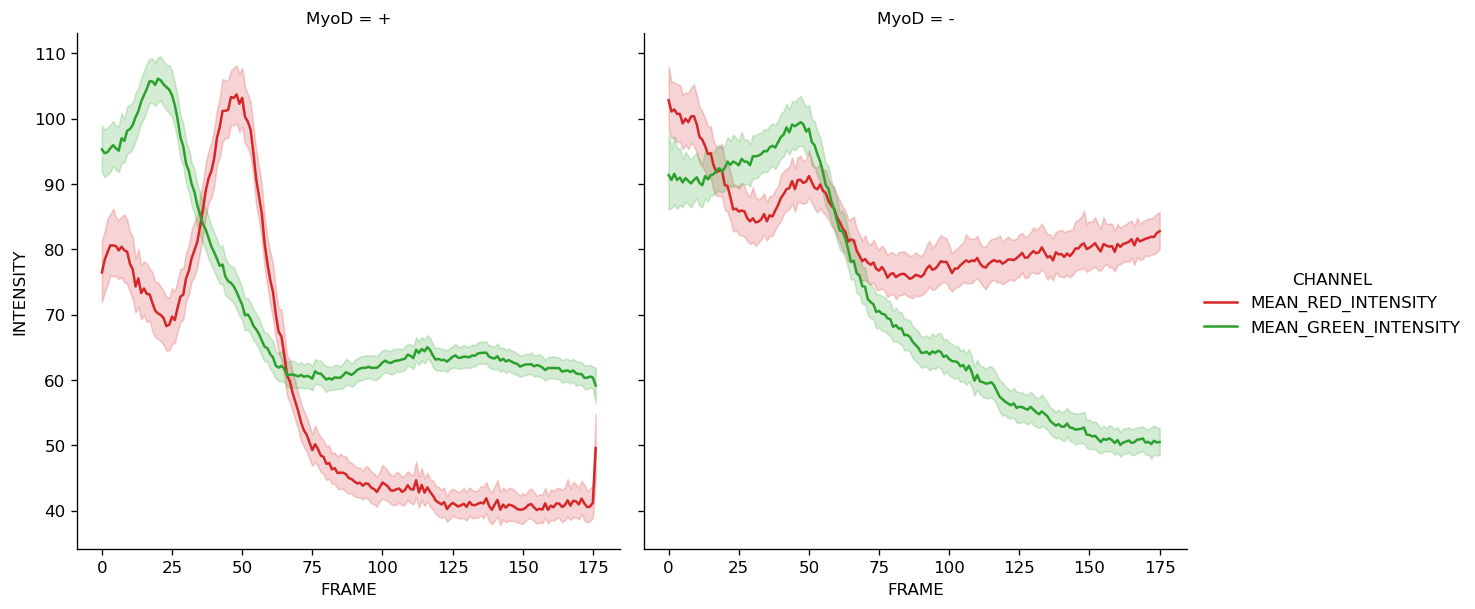

In [66]:
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (10, 6)


test = df[['FRAME', 'MyoD', 'MEAN_RED_INTENSITY', 'MEAN_GREEN_INTENSITY', 'SNR']]

test['MEAN_RED_INTENSITY'] = test['MEAN_RED_INTENSITY'] * test['SNR']
test['MEAN_GREEN_INTENSITY'] = test['MEAN_GREEN_INTENSITY'] * test['SNR']

test = pd.melt(test, 
               id_vars=['FRAME', 'MyoD'], 
               value_vars=['MEAN_RED_INTENSITY', 'MEAN_GREEN_INTENSITY'],
               var_name='CHANNEL',
               value_name='INTENSITY')


sns.relplot(data=test,
             x='FRAME',
             y='INTENSITY',
             hue='CHANNEL',
             col='MyoD',
             kind="line",
             palette=['C3', 'C2'])

# sns.relplot(data=test,
#              x='FRAME',
#              y='MEAN_RED_INTENSITY',
#              col='MyoD',
#              kind="line",
#              color='C3',
#              label='Mean Red Intensity')


# plt.ylabel("Mean Blob Intensity")
# plt.xlabel("Frame")
# plt.suptitle("Mean PIP FUCCI Signals Over Time")

In [ ]:
"""Add PF ratio:
    Normalize across a given frame (space), then normalize across a track (time)
"""

In [17]:

t0 = df[df['FRAME'] == 0]

FEATURES = [
    'POSITION_X',
    'POSITION_Y',
    'MEAN_GREEN_INTENSITY',
    'MEAN_BLUE_INTENSITY',
    'MEAN_RED_INTENSITY',
    'MANUAL_COLOR',
    'MEAN_INTENSITY',
    'MEDIAN_INTENSITY',
    'MIN_INTENSITY',
    'MAX_INTENSITY',
    'TOTAL_INTENSITY',
    'STANDARD_DEVIATION',
    'ESTIMATED_DIAMETER',
    'CONTRAST',
    'SNR',
    'SNR',
    'MEAN_GREEN_TRACK_INTENSITY',
    'MEAN_BLUE_TRACK_INTENSITY',
    'MEAN_RED_TRACK_INTENSITY',
    'TOTAL_DISTANCE_TRAVELED',
    'STEP'
]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(t0[FEATURES])
X_reduced = PCA(n_components=2).fit_transform(X_scaled)
results = pd.DataFrame(X_reduced)



results.head()

# sns.scatterplot(data)

,0,1
0,-3.067574,-0.662515
1,-2.254739,-0.048005
2,3.466462,1.420010
3,0.492543,-0.759195
4,1.867035,0.398232
